# EDA finale – Prix de vente des appartements (DVF 2020)

Ce notebook présente l’analyse exploratoire finale réalisée sur un dataset
construit à partir des données DVF.

Périmètre :
- mutations de type "Vente"
- appartements uniquement
- une mutation = un appartement


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)

from pathlib import Path


### 1. Chargement du dataset final

In [2]:
DATA_PATH = Path("../data/processed/dvf_appartements_vente_2020.parquet.gz")
df = pd.read_parquet(DATA_PATH)


### 2. Vérifications prétraitement

In [3]:
print(f"le dataset a {df.shape[0]} lignes et {df.shape[1]} colonnes")
display(df.head(3))
print(f"les colonnes du df sont : {df.columns}")

le dataset a 200546 lignes et 45 colonnes


,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,ancien_code_commune,ancien_nom_commune,id_parcelle,ancien_id_parcelle,numero_volume,lot1_numero,lot1_surface_carrez,lot2_numero,lot2_surface_carrez,lot3_numero,lot3_surface_carrez,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain_x,longitude,latitude,is_appartement,has_dependance,has_nan_type_local,surface_terrain_y,nb_lignes_mutation
0,2020-15,2020-07-02,1,Vente,136000.0,22.0,nan,RUE GEN DELESTRAINT,1650,1000.0,01053,Bourg-en-Bresse,01,NaN,nan,01053000AM0095,nan,nan,127,NaN,144,61.200001,nan,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,62.0,3.0,nan,nan,nan,nan,NaN,5.219443,46.198795,True,True,False,0.0,2
1,2020-34,2020-07-09,1,Vente,72000.0,110.0,nan,RUE DU PRE PAQUIER,0443,1750.0,01370,Saint-Laurent-sur-Saône,01,NaN,nan,013700000A0680,nan,nan,16,48.099998,nan,NaN,nan,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,47.0,2.0,nan,nan,nan,nan,NaN,4.842984,46.307400,True,True,False,0.0,2
2,2020-45,2020-07-10,1,Vente,70000.0,20.0,nan,RUE BOURGMAYER,0570,1000.0,01053,Bourg-en-Bresse,01,NaN,nan,01053000AD0650,nan,nan,11,45.660000,2,NaN,nan,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,46.0,2.0,nan,nan,nan,nan,NaN,5.222975,46.205639,True,False,False,0.0,1


les colonnes du df sont : Index(['id_mutation', 'date_mutation', 'numero_disposition', 'nature_mutation',
       'valeur_fonciere', 'adresse_numero', 'adresse_suffixe',
       'adresse_nom_voie', 'adresse_code_voie', 'code_postal', 'code_commune',
       'nom_commune', 'code_departement', 'ancien_code_commune',
       'ancien_nom_commune', 'id_parcelle', 'ancien_id_parcelle',
       'numero_volume', 'lot1_numero', 'lot1_surface_carrez', 'lot2_numero',
       'lot2_surface_carrez', 'lot3_numero', 'lot3_surface_carrez',
       'lot4_numero', 'lot4_surface_carrez', 'lot5_numero',
       'lot5_surface_carrez', 'nombre_lots', 'code_type_local', 'type_local',
       'surface_reelle_bati', 'nombre_pieces_principales',
       'code_nature_culture', 'nature_culture', 'code_nature_culture_speciale',
       'nature_culture_speciale', 'surface_terrain_x', 'longitude', 'latitude',
       'is_appartement', 'has_dependance', 'has_nan_type_local',
       'surface_terrain_y', 'nb_lignes_mutation'],
   

In [4]:
print(df.dtypes.sort_values())
df.info()

has_nan_type_local                        bool
has_dependance                            bool
is_appartement                            bool
nb_lignes_mutation                       int64
lot5_surface_carrez                    float32
lot5_numero                            float32
lot4_surface_carrez                    float32
lot4_numero                            float32
lot3_surface_carrez                    float32
surface_terrain_y                      float32
lot2_surface_carrez                    float32
lot1_surface_carrez                    float32
surface_reelle_bati                    float32
nombre_pieces_principales              float32
code_type_local                        float32
ancien_code_commune                    float32
surface_terrain_x                      float32
longitude                              float32
code_postal                            float32
latitude                               float32
adresse_numero                         float32
valeur_foncie

### 3. Sanity checks globaux

In [5]:
# Unicité
print("Unicité des identifiants de mutation:", df["id_mutation"].is_unique)
print("Unicité des natures de mutation:", df["nature_mutation"].value_counts().is_unique)
print(df["type_local"].value_counts(dropna=False))
# Moyenne des valeurs manquantes par colonne

(df.isna().mean()
    .sort_values(ascending=False)
    .head(15))

Unicité des identifiants de mutation: True
Unicité des natures de mutation: True
type_local
Appartement    200546
Name: count, dtype: int64


ancien_code_commune          0.999990
lot5_surface_carrez          0.999337
lot4_surface_carrez          0.997896
surface_terrain_x            0.996041
lot5_numero                  0.994535
lot3_surface_carrez          0.987988
lot4_numero                  0.984931
lot2_surface_carrez          0.843373
lot1_surface_carrez          0.462133
longitude                    0.016405
latitude                     0.016405
adresse_numero               0.010950
valeur_fonciere              0.000424
code_postal                  0.000065
nombre_pieces_principales    0.000005
dtype: float64

Regardons maintenant les ordres de grandeur des 2 colonnes qui nous intéressent le plus pour notre étude et qui serviront à déterminer le prix au mètre carré, notre variable cible

In [6]:
pd.options.display.float_format = '{:,.3f}'.format
df[["valeur_fonciere", "surface_reelle_bati"]].describe()


,valeur_fonciere,surface_reelle_bati
count,"200,461.000","200,545.000"
mean,"209,091.172",57.679
std,"465,285.125",28.863
min,1.000,1.000
25%,"94,000.000",38.000
50%,"150,000.000",56.000
75%,"239,000.000",72.000
max,"177,600,000.000","1,874.000"


#### Observations:
- valeur_foncière:
    - médiane : 150 000 €
    - 50% des ventes entre 94 000 € et 239 000 €
    - max : 177 600 000 €
    - min : 1 €
- Surface_reelle_bati:
    - médiane : 56 m²
    - 50% entre 38 m² et 72 m²
    - max : 1 874 m²
    - min : 1 m²

Il y a des valeurs extrèmes atypiques présentes en prix et surface. Nous déciderons par la suite ce que nous en ferons.

In [7]:
# Création de la variable prix_m2
df["prix_m2"] = df["valeur_fonciere"] / df["surface_reelle_bati"]
df["prix_m2"].describe()

count     200,460.000
mean        3,794.210
std         7,614.667
min             0.005
25%         1,920.000
50%         2,941.177
75%         4,464.789
max     2,864,516.250
Name: prix_m2, dtype: float64

- médiane = 2 940 €/m²
- Q1–Q3 : 1 920 € → 4 465 €
- min = 0,005 €/m²
- max = 2 864 516 €/m²
- écart-type très élevé (≈ 7 600)

Les quartiles sont réalistes pour la France en 2020, la médiane est crédible.  
Cependant, le minimum est très proche de 0 et le maximum est très élevé (+2,8 millions)  
On risque donc d'avoir une distribution extrèmement asymétrique, mais qui reflète pourtant bien le marché de l'immobilier. 

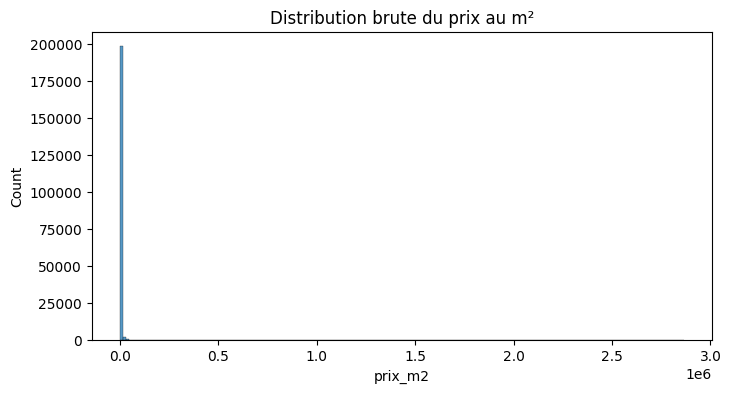

In [8]:
# Observation de la distribution du prix au m²
plt.figure(figsize=(8,4))
sns.histplot(df["prix_m2"], bins=200)
plt.title("Distribution brute du prix au m²")
plt.show()

L'observation de ce graphe ne nous apprend pas grand chose, à part que la distribution est asymétrique avec des extrèmes rares mais énormes.  On va observer à nouveau la distribution via une transformation logarithmique avant de voir si on fait aussi un zoom sur les quantiles.

In [9]:
# Création de la colonne log_prix_m2
df["log_prix_m2"] = np.log(df["prix_m2"])

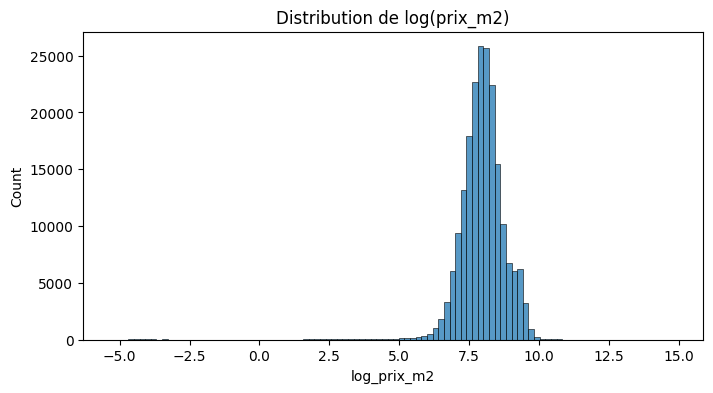

In [10]:
# Distribution de log(prix_m2)
plt.figure(figsize=(8,4))
sns.histplot(df["log_prix_m2"], bins=100)
plt.title("Distribution de log(prix_m2)")
plt.show()


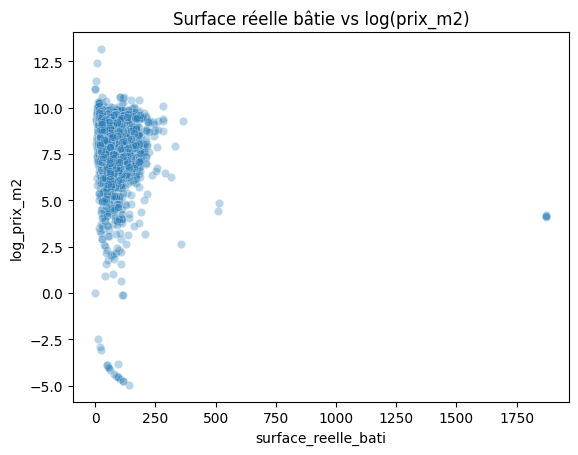

In [11]:
sns.scatterplot(
    data=df.sample(30000, random_state=42),
    x="surface_reelle_bati",
    y="log_prix_m2",
    alpha=0.3
)
plt.title("Surface réelle bâtie vs log(prix_m2)")
plt.show()

### Approche plus simple avec exclusions des quantiles extremes

Afin de faciliter l’analyse exploratoire et l’interprétation des résultats,
les valeurs extrêmes du prix au mètre carré sont exclues en conservant
l’intervalle compris entre le 1er et le 99e percentile. Cette approche permet
de se concentrer sur le marché résidentiel majoritaire, tout en conservant
la quasi-totalité des observations.


In [13]:
# Calcul des seuils
q_low = df["prix_m2"].quantile(0.01)
q_high = df["prix_m2"].quantile(0.99)
print(f"1er percentile: {q_low:.2f}, 99e percentile: {q_high:.2f}")

1er percentile: 464.84, 99e percentile: 14166.67


In [14]:
df_eda = df[
    (df["prix_m2"] >= q_low) &
    (df["prix_m2"] <= q_high)
].copy()

In [15]:
# Vérification de la nouvelle distribution du prix au m²
df_eda["prix_m2"].describe()

count   196,451.000
mean      3,658.612
std       2,572.777
min         465.000
25%       1,940.298
50%       2,941.177
75%       4,420.096
max      14,166.667
Name: prix_m2, dtype: float64

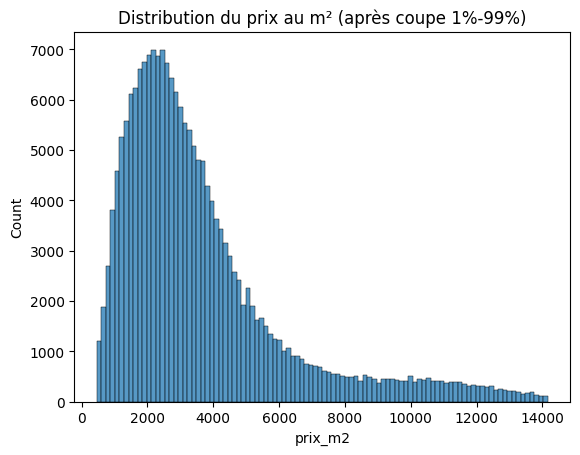

In [17]:
sns.histplot(df_eda["prix_m2"], bins=100)
plt.title("Distribution du prix au m² (après coupe 1%-99%)")
plt.show()

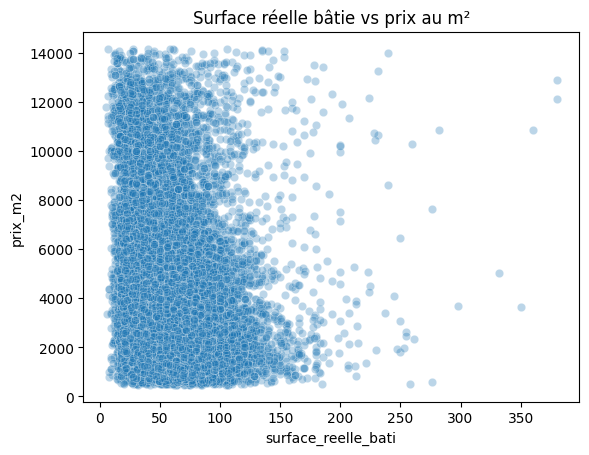

In [18]:
sns.scatterplot(
    data=df_eda.sample(30000, random_state=42),
    x="surface_reelle_bati",
    y="prix_m2",
    alpha=0.3
)
plt.title("Surface réelle bâtie vs prix au m²")
plt.show()